# Physics of Climate Exercise IV 
# (by Group 6)

## Task 1)
## What is the use of benthic $\delta^{18}O$ records? Shortly describe the causes of $\delta^{18}O$ variation.

### The use:

$\delta^{18}O$ is a measure of the ratio of the stable oxygen isotopes $^{18}O$ and $^{16}O$.
Why benthic $\delta^{18}O$ record are useful is visualized by the Rayleigh process, which describes the continuous depletion of a reservoir through a fractionating process.
The $\delta^{18}O$ value after a certain amount of time has changed due to the fractionation process.

$$\delta^{18}O=(1+\delta_0^{18}O)\cdot f^{\epsilon}−1.$$
(with: $f=\frac{N}{N_0}$ and $\epsilon = \alpha-1$)

The fractionation ratio $f=\frac{N}{N_0}$ is temperature dependent, which leads to the fact that $\delta^{18}O$ values can be used as a proxy for reconstructing temperature change and climate change in general.
Because the seawater, lakes and rivers are isotopically enriched as a result of evaporation (because the $^{18}O$ isotope is much heavier than the most abundend $^{16}O$.) $\delta^{18}O$ values are used to determine the changes between cooler periods such as the ice ages and today. 
Unicellular organisms like foraminifera are characterised by an external shell made of calcium carbonate $CaCO_3$. 
This shell however, is build up by oxygen, carbon and calcium from the surrounding waters and therefore incorporates the $\delta^{18}O$ to $\delta^{16}O$ during that time.
After such individuals die, they sink down to the sea bed preserving a long and invaluable record of global climate change. Therefore benthic $\delta^{18}O$ records from shells of unicellular organisms are a useful tool to describe the temperature and temperatures changes as a function of time.

### The causes of $\delta^{18}O$ variation:

The variations in the $\delta^{18}O$ ratio are a straight consequence of temperature and precipitation changes due to the temperature dependence of the fractionation factor f.
By neglecting salinity and ice volume it is possible to measure the temperature by using the linear interplay betweend $\delta^{18}O$ records of the sea water and calcite mentioned above and temperature itself

$$T(°C)=16.9 - 4.0\cdot\delta^{18}O_{calcite}-\delta^{18}O_{sea water}.$$

Therefore $\delta^{18}O$ measurements preserve also a record for the Milankovitch cycles revealing an approximately 100k-year cyclicity in the Earth's climate.

$\hspace{19cm}$ (Source: Wikipedia/Isotope_Analysis)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import cartopy.crs as ccrs
import cartopy.util
import scipy.signal as signal

We use the record 502.

In [5]:
#path="/Users/niklasmerz/DocumeLR04cores_spec_corr/502_LR04age.csv"
path='LR04cores/LR04cores_spec_corr/502_LR04age.txt'
colnames=['Depth [m]', 'Age', 'O_18']
data = pd.read_csv(path,delim_whitespace=True, names = colnames)

In [6]:
data

,Depth [m],Age,O_18
0,0.200,2.711970,2.82
1,0.305,8.030686,2.87
2,0.430,13.454626,3.60
3,0.515,17.142905,4.33
4,0.590,20.602837,4.49
...,...,...,...
539,58.350,2567.365400,2.88
540,58.350,2567.365400,2.95
541,59.170,2595.829900,2.81
542,59.360,2602.426800,3.23


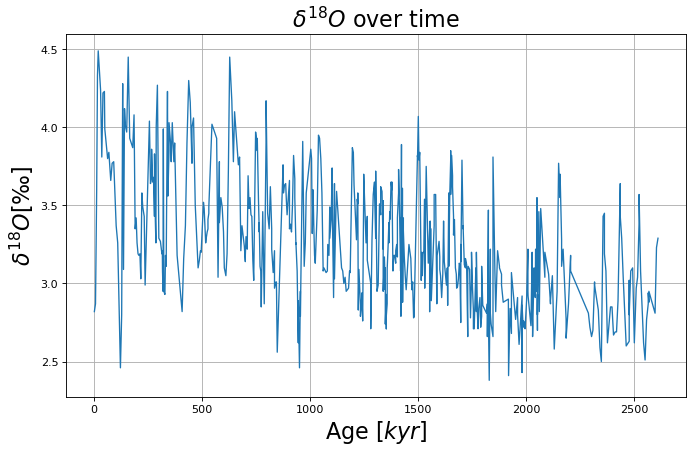

In [7]:
plt.figure(figsize=(10,6), dpi=80)
parameters={'axes.labelsize':20,'axes.titlesize':20,'legend.fontsize':15}
rcParams.update(parameters)
plt.rc('figure', figsize=(15,9))
plt.plot(data["Age"],data["O_18"],linewidth=1.2)
plt.xlabel(r'Age $[kyr]$')
plt.ylabel(r'$\delta^{18}O[\perthousand]$')
plt.title(r'$\delta^{18}O$ over time')
plt.grid(which="both")


## B)

Text(0.5, 1.0, 'Location of Record 502: 11°N, 80°W (from deMenecal et al, 1992)')

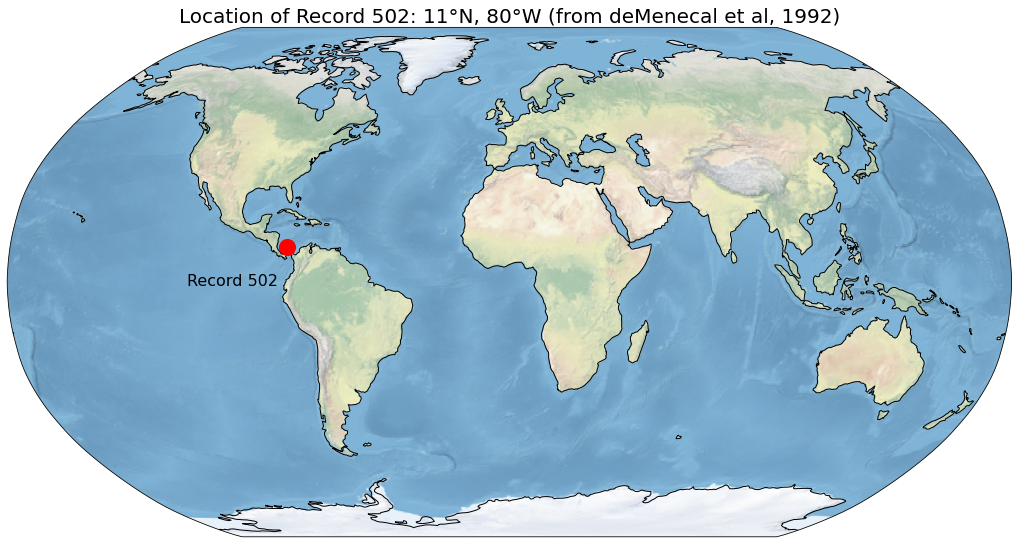

In [36]:
lat=11
lon=-80

#plot
fig=plt.figure(figsize=(18,12))
ax=fig.add_subplot(1,1,1,projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()
plt.plot(lon,lat,color='red',marker='o',markersize=16, transform=ccrs.Geodetic())
plt.text(lon-3,lat-12,'Record 502',
         horizontalalignment='right',
         transform=ccrs.Geodetic(),size=16)
plt.title('Location of Record 502: 11°N, 80°W (from deMenecal et al, 1992)')

To look at the change of the Variablity of the $\delta^{18}O$-Value we will make use of the standart derivation. We take a time intervall of ±100 kyrs for each individual time step and calculate the standard derivation of the $\delta^{18}O$-Values. The standard derivation gives us a good estimate of the variability of a time intervall. We do not the the first and last 5 Values into account because we have less datas  without recognising the first 15 and the last 15 Values into account because there we don´t have data for the full intervall. 

Of course this means that our variability values are correlated to each other and it also depends of the chosen time intervall.

In [58]:
data_2 = np.zeros(523)
n = range(15,538)
step=100
for i in n:
    data_2[i-15] = np.std(data[(data["Age"] < (data["Age"][i]+step)) & (data["Age"] > (data["Age"][i]-step))])["O_18"]

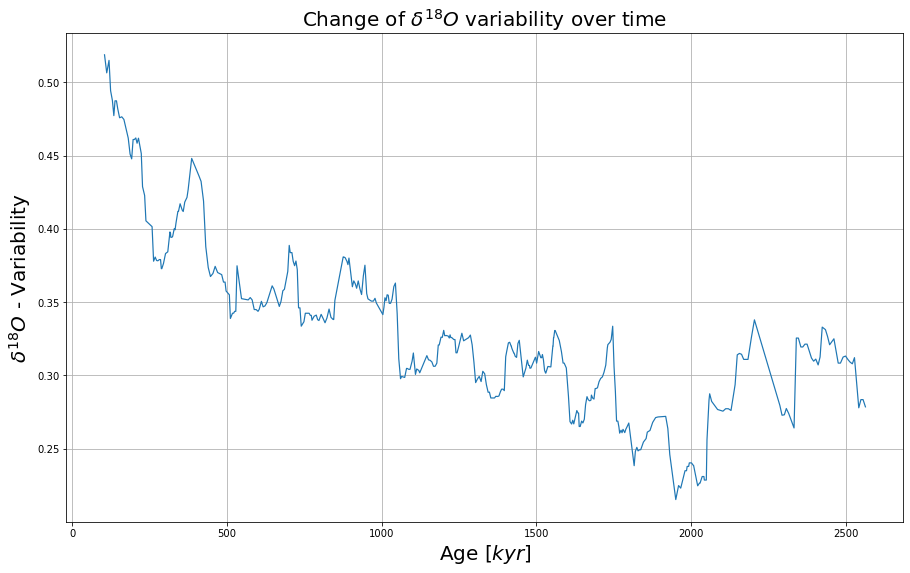

In [59]:
plt.rc('figure', figsize=(15,9))
plt.plot(data["Age"][15:538],data_2,linewidth=1.2)

plt.xlabel(r'Age $[kyr]$')
plt.ylabel(r'$\delta^{18}O$ - Variability')

plt.title(r'Change of $\delta^{18}O$ variability over time')
plt.grid(which="both")

This decay in variability is also visible for other time steps:

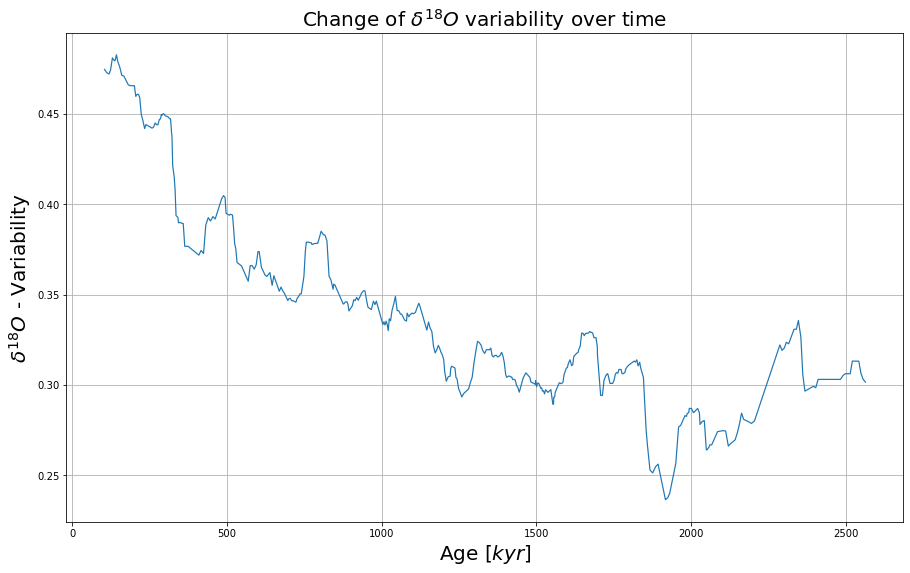

In [62]:
data_2 = np.zeros(523)
n = range(15,538)
step=200
for i in n:
    data_2[i-15] = np.std(data[(data["Age"] < (data["Age"][i]+step)) & (data["Age"] > (data["Age"][i]-step))])["O_18"]
plt.rc('figure', figsize=(15,9))
plt.plot(data["Age"][15:538],data_2,linewidth=1.2)

plt.xlabel(r'Age $[kyr]$')
plt.ylabel(r'$\delta^{18}O$ - Variability')

plt.title(r'Change of $\delta^{18}O$ variability over time')
plt.grid(which="both")

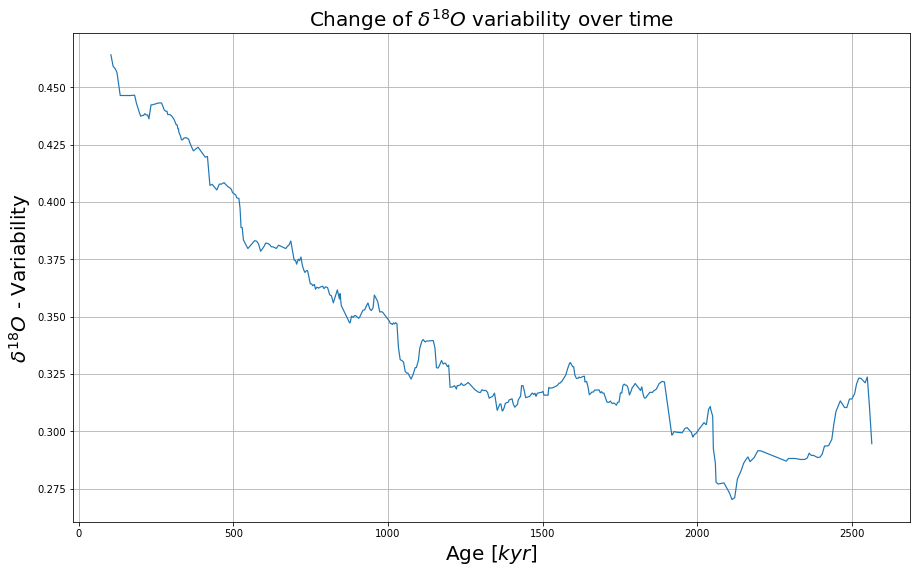

In [63]:
data_2 = np.zeros(523)
n = range(15,538)
step=400
for i in n:
    data_2[i-15] = np.std(data[(data["Age"] < (data["Age"][i]+step)) & (data["Age"] > (data["Age"][i]-step))])["O_18"]
plt.rc('figure', figsize=(15,9))
plt.plot(data["Age"][15:538],data_2,linewidth=1.2)

plt.xlabel(r'Age $[kyr]$')
plt.ylabel(r'$\delta^{18}O$ - Variability')

plt.title(r'Change of $\delta^{18}O$ variability over time')
plt.grid(which="both")

As the picture above clearly states the variation of the $\delta^{18}O$-Value drops with the age till roughly 1000 kyr ago and then stays on a certain level with small derivations from it. The lowest value is around 2000 kyrs ago till it rises again to the level from 1000 kyrs.

If we now look at the same data but not at the sliding average but use boxsizes of 50 kyrs each we get the following plot:

In [65]:
data_2 = np.zeros(52)
n = range(0,52)
step=50
for i in n:
    data_2[i] = np.std(data[(data["Age"] < ((i*step+step))) & (data["Age"] > ((i*step)))])["O_18"]

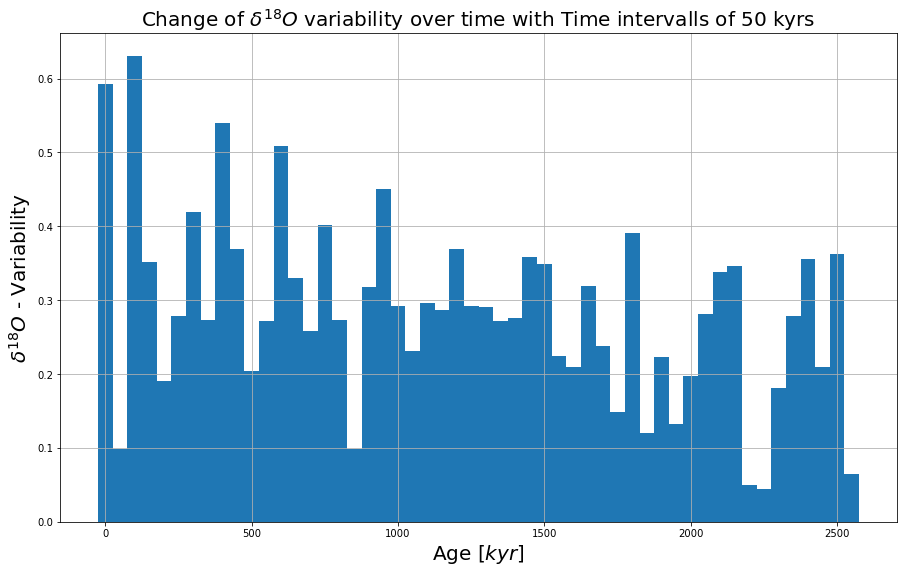

In [78]:
x_seq = range(0,2600,50)
plt.rc('figure', figsize=(15,9))
plt.bar(x_seq,data_2,width=50)

plt.xlabel(r'Age $[kyr]$')
plt.ylabel(r'$\delta^{18}O$ - Variability')

plt.title(r'Change of $\delta^{18}O$ variability over time with Time intervalls of 50 kyrs')
plt.grid(which="both")

Both methods show a decrease of variability with time.

## Task 4)
## What is a Lomb-Scargle periodogram? What is the advantage over other types of spectral analysis tools? Apply it to your data and plot both a frequency as well as a period spectrum.

The Lomb–Scargle periodogram is a well-known algorithm for detecting and characterizing periodic signals in unevenly sampled data.
The Lomb–Scargle periodogram is a method that allows efficient computation of a Fourier-like power spectrum estimator from unevenly sampled data, resulting in an intuitive means of determining the period of oscillation.

$\hspace{12cm}$ (Source: https://iopscience.iop.org/article/10.3847/1538-4365/aab766/pdf)

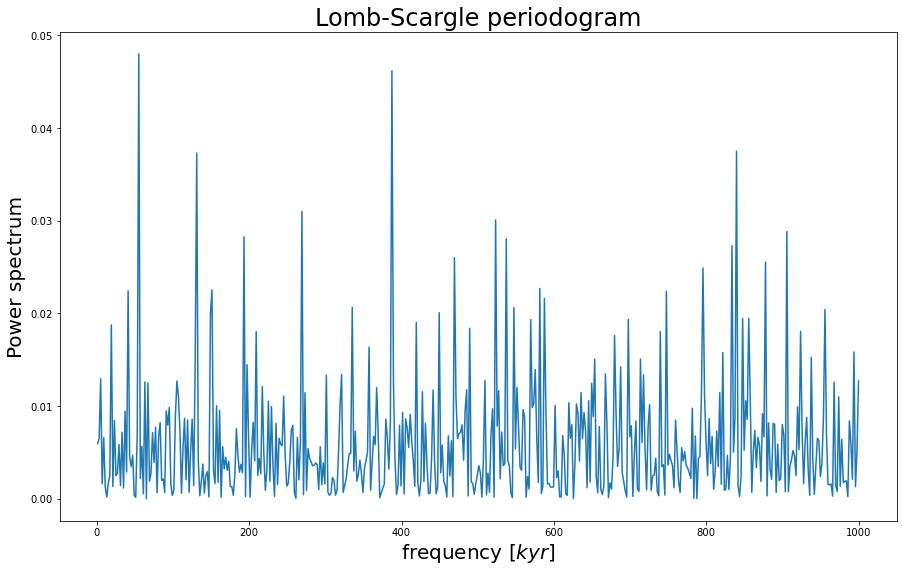

In [79]:
f=np.linspace(1,1000,500)
pgram = signal.lombscargle(data["Age"], data["O_18"], f, normalize=True)
plt.xlabel(r'frequency $[kyr]$')
plt.ylabel(r'Power spectrum')
plt.title('Lomb-Scargle periodogram',fontsize=24)
plt.plot(f, pgram)
plt.show()